**Name : Rakshyak Basyal**

**Student ID: 2432209**

Classification Task


Dataset: water_portability.csv

Aligns with: SDG 6 (Clean Water and Sanitation)

Targrt Variable: Potability

In [2]:
# Mount Google Drive for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1. Exploratory Data Analysis (EDA) and Data Understanding

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from collections import Counter

In [4]:
# Load the Dataset
file_path = "/content/drive/MyDrive/5CS037 - Concepts and Technologies of AI/Final Portfolio/Classification/water_potability.csv"
df = pd.read_csv(file_path)

# Dataset Overview
print("\nFirst 10 rows of the dataset:")
df.head(10)


First 10 rows of the dataset:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
# Identify the number of rows and columns in the dataset.
rows, columns = df.shape
print("Number of rows and columns in the dataset:")
print("Rows:",rows,"Columns:",columns)

Number of rows and columns in the dataset:
Rows: 3276 Columns: 10


In [7]:
# Attribute List
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Columns in the dataset:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

Missing values in each column:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [8]:
# Filling missing values with median
df.fillna(df.median(), inplace=True)

# Verify no missing values remain
print("After filling missing values:")
print(df.isnull().sum())

After filling missing values:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [9]:
# Summary statistics of the dataset
print("Summary Statistics:")
df.describe().T

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.074194,1.470040,0.000000,6.277673,7.036752,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.608364,36.143851,129.000000,317.094638,333.073546,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,66.407478,15.769958,0.738000,56.647656,66.622485,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


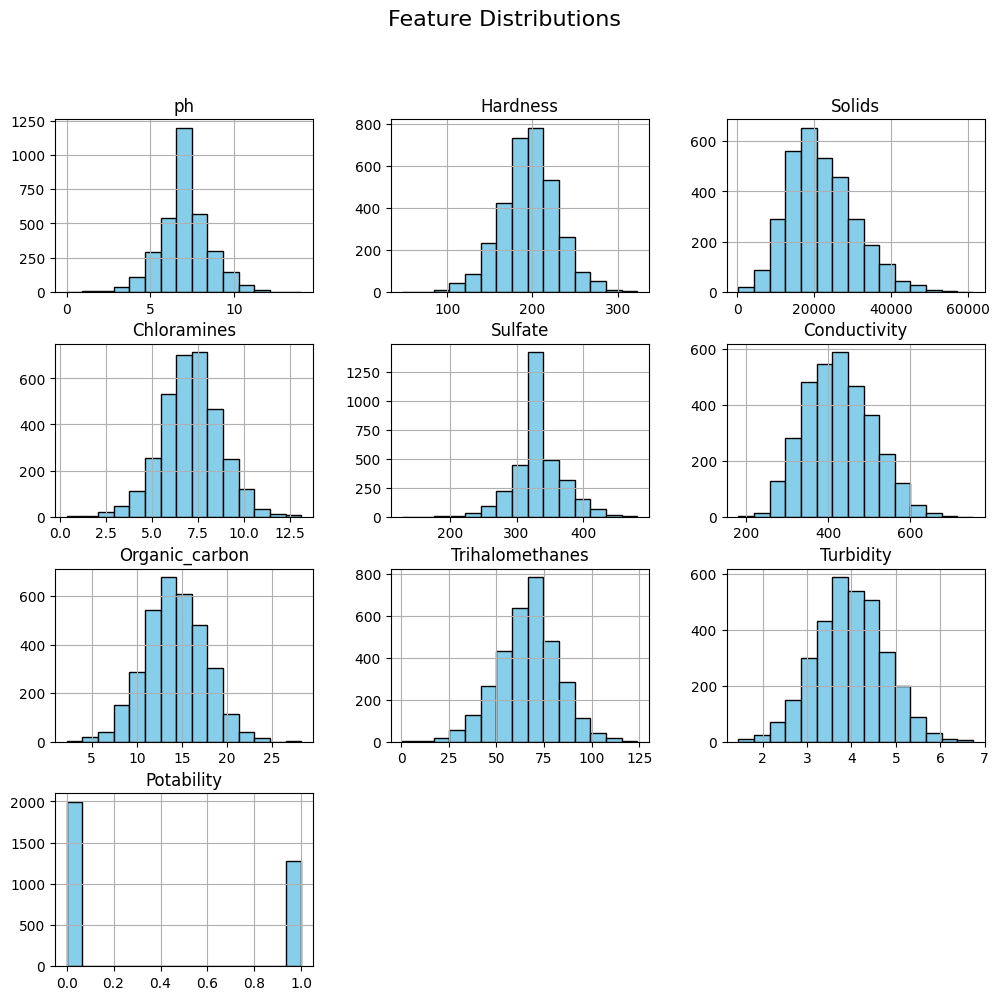

In [10]:
# Feature Distributions
df.hist(figsize=(12, 11), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

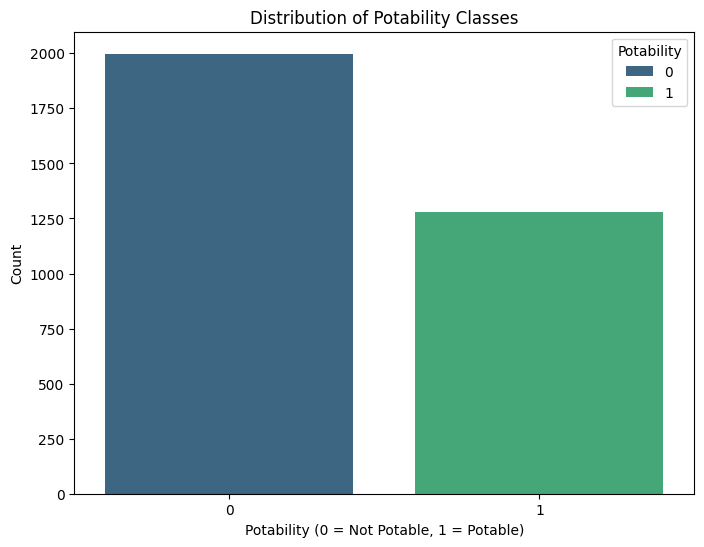


Class Distribution Percentage:
Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


In [11]:
# Checking class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Potability'], hue=df['Potability'], palette='viridis')
plt.title("Distribution of Potability Classes")
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Count")
plt.show()

# Print class distribution percentages
print("\nClass Distribution Percentage:")
class_counts = df['Potability'].value_counts(normalize=True) * 100
print(class_counts)

In [12]:
# Handling class imbalane

# Separate majority and minority classes
df_majority = df[df["Potability"] == 0]
df_minority = df[df["Potability"] == 1]

# Oversample the minority class to match majority class size
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print("\nNew Class Distribution Percentage:")
print(df_balanced["Potability"].value_counts(normalize=True) * 100)


New Class Distribution Percentage:
Potability
0    50.0
1    50.0
Name: proportion, dtype: float64


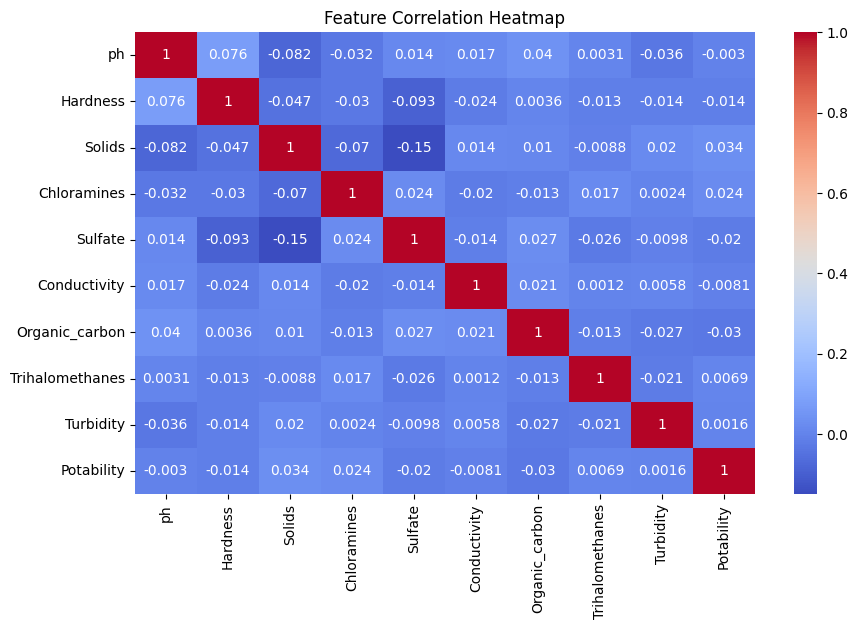

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

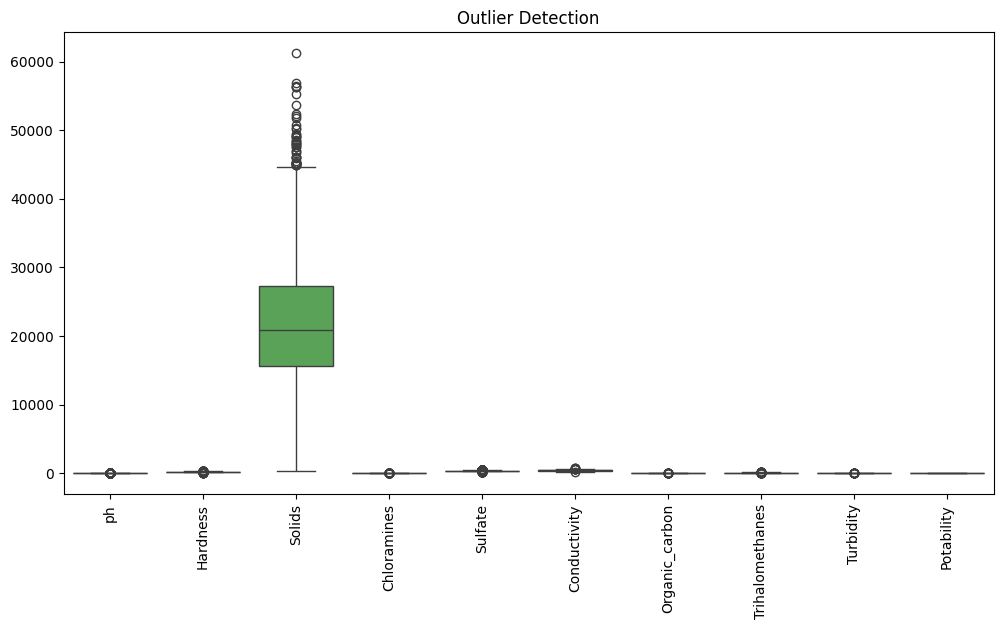

In [14]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df, palette="Set1")
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()

###2. Logistic Regression from Scratch

In [15]:
# Splitting balanced dataset into features and target variable
X = df_balanced.drop(columns=["Potability"]).values
y = df_balanced["Potability"].values

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize weights and bias
def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

# Sigmoid function (with overflow protection)
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Prevent overflow
    return 1 / (1 + np.exp(-z))

# Compute cost (Log loss) with numerical stability
def compute_cost(y, y_pred):
    m = len(y)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Avoid log(0)
    return - (1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Compute gradients
def compute_gradients(X, y, y_pred):
    m = len(y)
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)
    return dw, db

# Logistic Regression Model from Scratch
def logistic_regression(X, y, learning_rate=0.01, epochs=2000):
    n_samples, n_features = X.shape
    weights, bias = initialize_weights(n_features)
    costs = []

    for i in range(epochs):
        # Forward pass
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        # Compute loss
        cost = compute_cost(y, y_pred)
        costs.append(cost)

        # Compute gradients
        dw, db = compute_gradients(X, y, y_pred)

        # Update weights
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, costs

# Train Logistic Regression Model
weights, bias, costs = logistic_regression(X_train, y_train, learning_rate=0.1, epochs=2000)


# Predictions
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_pred]

y_pred_test = predict(X_test, weights, bias)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy: 0.50125
Precision: 0.5012658227848101
Recall: 0.495
F1 Score: 0.4981132075471698

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50       400
           1       0.50      0.49      0.50       400

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800



### 3. Machine Learning Models

In [16]:
# Testing Primary models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.505
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51       400
           1       0.51      0.50      0.50       400

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.50       800
weighted avg       0.51      0.51      0.50       800

Confusion Matrix:
 [[205 195]
 [201 199]]

Decision Tree Performance:
Accuracy: 0.74875
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.68      0.73       400
           1       0.72      0.82      0.77       400

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

Confusion Matrix:
 [[271 129]
 [ 72 328]]

Random Forest Performance:
Accuracy: 0.815
Classification Report:
               precision    recall  f1-score   supp

###4. Hyper-parameter Optimization with Cross-Validation

In [17]:
# Define hyperparameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters for Decision Tree:", dt_grid_search.best_params_)
print("Best Hyperparameters for Random Forest:", rf_grid_search.best_params_)

# Train models with best parameters
best_dt = dt_grid_search.best_estimator_
best_rf = rf_grid_search.best_estimator_

# Predictions with optimized models
dt_pred_opt = best_dt.predict(X_test)
rf_pred_opt = best_rf.predict(X_test)

# Evaluate optimized models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance After Hyperparameter Tuning:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

evaluate_model(y_test, dt_pred_opt, "Optimized Decision Tree")
evaluate_model(y_test, rf_pred_opt, "Optimized Random Forest")


Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Optimized Decision Tree Performance After Hyperparameter Tuning:
Accuracy: 0.74625
Precision: 0.7184035476718403
Recall: 0.81
F1 Score: 0.7614571092831962

Optimized Random Forest Performance After Hyperparameter Tuning:
Accuracy: 0.8175
Precision: 0.8432432432432433
Recall: 0.78
F1 Score: 0.8103896103896104


### 5. Feature Selection

In [18]:
# Use RFE with the best Random Forest model
rfe = RFE(best_rf, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

# Get selected features
selected_features = df_balanced.drop(columns=["Potability"]).columns[rfe.support_]
print("Selected Features:", selected_features)

# Transform the dataset using selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train and evaluate the model again using only selected features
best_rf.fit(X_train_selected, y_train)
rf_pred_selected = best_rf.predict(X_test_selected)

# Evaluate the final model with selected features
evaluate_model(y_test, rf_pred_selected, "Final Random Forest with Selected Features")


Selected Features: Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate'], dtype='object')

Final Random Forest with Selected Features Performance After Hyperparameter Tuning:
Accuracy: 0.8175
Precision: 0.8223350253807107
Recall: 0.81
F1 Score: 0.8161209068010076


### 6. Final Model

In [19]:
# Train final Decision Tree with selected features
best_dt.fit(X_train_selected, y_train)
dt_pred_final = best_dt.predict(X_test_selected)

# Train final Random Forest with selected features
best_rf.fit(X_train_selected, y_train)
rf_pred_final = best_rf.predict(X_test_selected)

# Evaluate both final models
evaluate_model(y_test, dt_pred_final, "Final Optimized Decision Tree")
evaluate_model(y_test, rf_pred_final, "Final Optimized Random Forest")

# Compare before and after feature selection
print("\nPerformance Comparison (Before vs After Feature Selection):")
print("Decision Tree - Before:", accuracy_score(y_test, dt_pred_opt), "| After:", accuracy_score(y_test, dt_pred_final))
print("Random Forest - Before:", accuracy_score(y_test, rf_pred_opt), "| After:", accuracy_score(y_test, rf_pred_final))

# Store final model performances
final_performance = {
    "Final Optimized Decision Tree": accuracy_score(y_test, dt_pred_final),
    "Final Optimized Random Forest": accuracy_score(y_test, rf_pred_final)
}

# Find and print the best final model
best_final_model = max(final_performance, key=final_performance.get)
best_final_accuracy = final_performance[best_final_model]
print(f"\nBest Final Model: {best_final_model} with Accuracy: {best_final_accuracy:.4f}")



Final Optimized Decision Tree Performance After Hyperparameter Tuning:
Accuracy: 0.75
Precision: 0.7242152466367713
Recall: 0.8075
F1 Score: 0.7635933806146572

Final Optimized Random Forest Performance After Hyperparameter Tuning:
Accuracy: 0.8175
Precision: 0.8223350253807107
Recall: 0.81
F1 Score: 0.8161209068010076

Performance Comparison (Before vs After Feature Selection):
Decision Tree - Before: 0.74625 | After: 0.75
Random Forest - Before: 0.8175 | After: 0.8175

Best Final Model: Final Optimized Random Forest with Accuracy: 0.8175
